<a href="https://colab.research.google.com/github/Kolawole-a2/Kola_Projects/blob/main/Praxis_Code_Test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from google.colab import files
import io

def upload_and_parse_risk_register_colab():
    """
    Colab uploader for Risk Register files (CSV or Excel).
    Auto-calculates residual scores, assigns risk levels, and returns the dataframe.
    """

    print("📂 Please upload your Risk Register (CSV or Excel)...")
    uploaded = files.upload()

    if uploaded:
        for filename in uploaded.keys():
            print(f"✅ Uploaded: {filename}")

            # Load file
            if filename.endswith(".csv"):
                df = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))
            elif filename.endswith(".xlsx"):
                df = pd.read_excel(io.BytesIO(uploaded[filename]))
            else:
                print("❌ Unsupported file type. Please upload CSV or XLSX.")
                return None

            # Expected columns
            expected_columns = [
                "ID", "Name", "Description", "Controls", "Categories", "Treatment",
                "Inherent impact", "Inherent likelihood", "Inherent Score",
                "Residual Impact", "Residual likelihood", "Residual Score",
                "Type", "Status", "Owner", "Anticipated completion date",
                "Completed date", "Reviewers"
            ]

            # Validate
            missing = set(expected_columns) - set(df.columns)
            if missing:
                print(f"❌ Missing columns: {missing}")
                return None

            # Convert numeric fields
            numeric_fields = [
                "Inherent impact", "Inherent likelihood", "Inherent Score",
                "Residual Impact", "Residual likelihood", "Residual Score"
            ]
            for field in numeric_fields:
                df[field] = pd.to_numeric(df[field], errors="coerce")

            # Auto-calculate missing Residual Scores
            missing_residuals = df["Residual Score"].isnull()

            if missing_residuals.any():
                print(f"🔧 Auto-calculating {missing_residuals.sum()} missing Residual Scores...")
                df.loc[missing_residuals, "Residual Score"] = (
                    df.loc[missing_residuals, "Residual Impact"] *
                    df.loc[missing_residuals, "Residual likelihood"]
                )

            # Assign Risk Levels
            def assign_risk_level(score):
                if pd.isna(score):
                    return "Unknown"
                elif score >= 15:
                    return "Critical"
                elif score >= 10:
                    return "High"
                elif score >= 5:
                    return "Medium"
                else:
                    return "Low"

            df["Risk Level"] = df["Residual Score"].apply(assign_risk_level)

            print("✅ Risk Register Processed Successfully!")
            display(df.sort_values(by="Residual Score", ascending=False))

            return df

    else:
        print("❗ No file uploaded.")
        return None


In [4]:
df_risks = upload_and_parse_risk_register_colab()


📂 Please upload your Risk Register (CSV or Excel)...


Saving automated_risk_assessment.csv to automated_risk_assessment.csv
✅ Uploaded: automated_risk_assessment.csv
✅ Risk Register Processed Successfully!


,ID,Name,Description,Controls,Categories,Treatment,Inherent impact,Inherent likelihood,Inherent Score,Residual Impact,Residual likelihood,Residual Score,Type,Status,Owner,Anticipated completion date,Completed date,Reviewers,Risk Level
11,EFM-12,Email Filtering and Monitoring,Control to ensure email filtering and monitori...,No,Email System,Avoid,5,2,10,5,2,10,Preventive,Monitoring,IT Department,2025-04-08,NaN,External Consultant,High
5,CSP-06,Cloud Security Policies,Control to ensure cloud security policies for ...,Yes,Cloud Storage,Transfer,5,2,10,5,2,10,Preventive,Monitoring,Operations Manager,2025-04-10,NaN,Risk Manager,High
6,BAR-07,Backup and Recovery,Control to ensure backup and recovery for back...,No,Backup System,Mitigate,2,4,8,2,4,8,Detective,Completed,Compliance Officer,2025-02-28,2025-06-06,External Consultant,Medium
7,PAC-08,Physical Access Control,Control to ensure physical access control for ...,No,Physical Server Room,Accept,5,2,10,4,2,8,Preventive,Monitoring,Compliance Officer,2025-04-08,NaN,External Consultant,Medium
12,ISM-13,IoT Security Management,Control to ensure iot security management for ...,Yes,Patient Monitoring Devices,Transfer,3,4,12,2,4,8,Preventive,Monitoring,Compliance Officer,2025-03-27,NaN,Internal Auditor,Medium
16,SPP-17,Secure Printing Policies,Control to ensure secure printing policies for...,No,Printers,Mitigate,2,5,10,1,4,4,Preventive,Active,IT Department,2025-05-31,NaN,Internal Auditor,Low
17,SMM-18,Secure Meeting Management,Control to ensure secure meeting management fo...,No,Conference Systems,Transfer,3,5,15,1,4,4,Detective,Completed,IT Department,2025-02-28,2025-03-24,Risk Manager,Low
2,NAC-03,Network Access Control,Control to ensure network access control for n...,Yes,Network Switch,Avoid,2,5,10,1,4,4,Detective,Completed,Compliance Officer,2025-05-01,2025-04-20,Internal Auditor,Low
0,PMM-01,Patch Management,Control to ensure patch management for server.,Yes,Server,Transfer,2,3,6,1,3,3,Detective,Completed,IT Department,2025-04-10,2025-06-14,Internal Auditor,Low
3,FCC-04,Firewall Configuration,Control to ensure firewall configuration for f...,Yes,Firewall,Transfer,1,5,5,1,3,3,Corrective,Monitoring,Operations Manager,2025-03-28,NaN,Risk Manager,Low


In [8]:
# 📚 Install Required Libraries (if not already installed)
!pip install -q seaborn

# 📦 Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io

# 📂 Risk Register Ingestion Function
def upload_and_parse_risk_register_colab():
    """
    Full Risk Register Upload + Residual Score Auto-Calculation + Risk Level Assignment + Heatmap.
    Google Colab Version.
    """

    print("📂 Please upload your Risk Register (CSV or Excel)...")
    uploaded = files.upload()

    if uploaded:
        for filename in uploaded.keys():
            print(f"✅ Uploaded: {filename}")

            # Load file
            if filename.endswith(".csv"):
                df = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))
            elif filename.endswith(".xlsx"):
                df = pd.read_excel(io.BytesIO(uploaded[filename]))
            else:
                print("❌ Unsupported file type. Please upload CSV or XLSX.")
                return None

            # Expected columns
            expected_columns = [
                "ID", "Name", "Description", "Controls", "Categories", "Treatment",
                "Inherent impact", "Inherent likelihood", "Inherent Score",
                "Residual Impact", "Residual likelihood", "Residual Score",
                "Type", "Status", "Owner", "Anticipated completion date",
                "Completed date", "Reviewers"
            ]

            # Validate
            missing = set(expected_columns) - set(df.columns)
            if missing:
                print(f"❌ Missing columns: {missing}")
                return None

            # Convert numeric fields
            numeric_fields = [
                "Inherent impact", "Inherent likelihood", "Inherent Score",
                "Residual Impact", "Residual likelihood", "Residual Score"
            ]
            for field in numeric_fields:
                df[field] = pd.to_numeric(df[field], errors="coerce")

            # Auto-calculate missing Residual Scores
            missing_residuals = df["Residual Score"].isnull()

            if missing_residuals.any():
                print(f"🔧 Auto-calculating {missing_residuals.sum()} missing Residual Scores...")
                df.loc[missing_residuals, "Residual Score"] = (
                    df.loc[missing_residuals, "Residual Impact"] *
                    df.loc[missing_residuals, "Residual likelihood"]
                )

            # Assign Risk Levels
            def assign_risk_level(score):
                if pd.isna(score):
                    return "Unknown"
                elif score >= 15:
                    return "Critical"
                elif score >= 10:
                    return "High"
                elif score >= 5:
                    return "Medium"
                else:
                    return "Low"

            df["Risk Level"] = df["Residual Score"].apply(assign_risk_level)

            # ✅ Display Final Risk Table Sorted by Residual Score
            display(df.sort_values(by="Residual Score", ascending=False))

            # 🎨 Plot Heatmap
            try:
                plt.figure(figsize=(12, 8))
                heatmap_data = df.pivot_table(
                    index="Categories",
                    columns="Risk Level",
                    values="Residual Score",
                    aggfunc="count",
                    fill_value=0
                )
                sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm")
                plt.title("🔥 Risk Heatmap by Category and Risk Level")
                plt.ylabel("Risk Categories")
                plt.xlabel("Risk Levels")
                plt.xticks(rotation=45)
                plt.yticks(rotation=0)
                plt.show()
            except Exception as e:
                print(f"⚠️ Heatmap generation error: {e}")

            return df

    else:
        print("❗ No file uploaded.")
        return None

# 🎯 Now run this cell to use it:
# df_risks = upload_and_parse_risk_register_colab()


📂 Please upload your Risk Register (CSV or Excel)...


Saving automated_risk_assessment.csv to automated_risk_assessment (1).csv
✅ Uploaded: automated_risk_assessment (1).csv


,ID,Name,Description,Controls,Categories,Treatment,Inherent impact,Inherent likelihood,Inherent Score,Residual Impact,Residual likelihood,Residual Score,Type,Status,Owner,Anticipated completion date,Completed date,Reviewers,Risk Level
11,EFM-12,Email Filtering and Monitoring,Control to ensure email filtering and monitori...,No,Email System,Avoid,5,2,10,5,2,10,Preventive,Monitoring,IT Department,2025-04-08,NaN,External Consultant,High
5,CSP-06,Cloud Security Policies,Control to ensure cloud security policies for ...,Yes,Cloud Storage,Transfer,5,2,10,5,2,10,Preventive,Monitoring,Operations Manager,2025-04-10,NaN,Risk Manager,High
6,BAR-07,Backup and Recovery,Control to ensure backup and recovery for back...,No,Backup System,Mitigate,2,4,8,2,4,8,Detective,Completed,Compliance Officer,2025-02-28,2025-06-06,External Consultant,Medium
7,PAC-08,Physical Access Control,Control to ensure physical access control for ...,No,Physical Server Room,Accept,5,2,10,4,2,8,Preventive,Monitoring,Compliance Officer,2025-04-08,NaN,External Consultant,Medium
12,ISM-13,IoT Security Management,Control to ensure iot security management for ...,Yes,Patient Monitoring Devices,Transfer,3,4,12,2,4,8,Preventive,Monitoring,Compliance Officer,2025-03-27,NaN,Internal Auditor,Medium
16,SPP-17,Secure Printing Policies,Control to ensure secure printing policies for...,No,Printers,Mitigate,2,5,10,1,4,4,Preventive,Active,IT Department,2025-05-31,NaN,Internal Auditor,Low
17,SMM-18,Secure Meeting Management,Control to ensure secure meeting management fo...,No,Conference Systems,Transfer,3,5,15,1,4,4,Detective,Completed,IT Department,2025-02-28,2025-03-24,Risk Manager,Low
2,NAC-03,Network Access Control,Control to ensure network access control for n...,Yes,Network Switch,Avoid,2,5,10,1,4,4,Detective,Completed,Compliance Officer,2025-05-01,2025-04-20,Internal Auditor,Low
0,PMM-01,Patch Management,Control to ensure patch management for server.,Yes,Server,Transfer,2,3,6,1,3,3,Detective,Completed,IT Department,2025-04-10,2025-06-14,Internal Auditor,Low
3,FCC-04,Firewall Configuration,Control to ensure firewall configuration for f...,Yes,Firewall,Transfer,1,5,5,1,3,3,Corrective,Monitoring,Operations Manager,2025-03-28,NaN,Risk Manager,Low


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


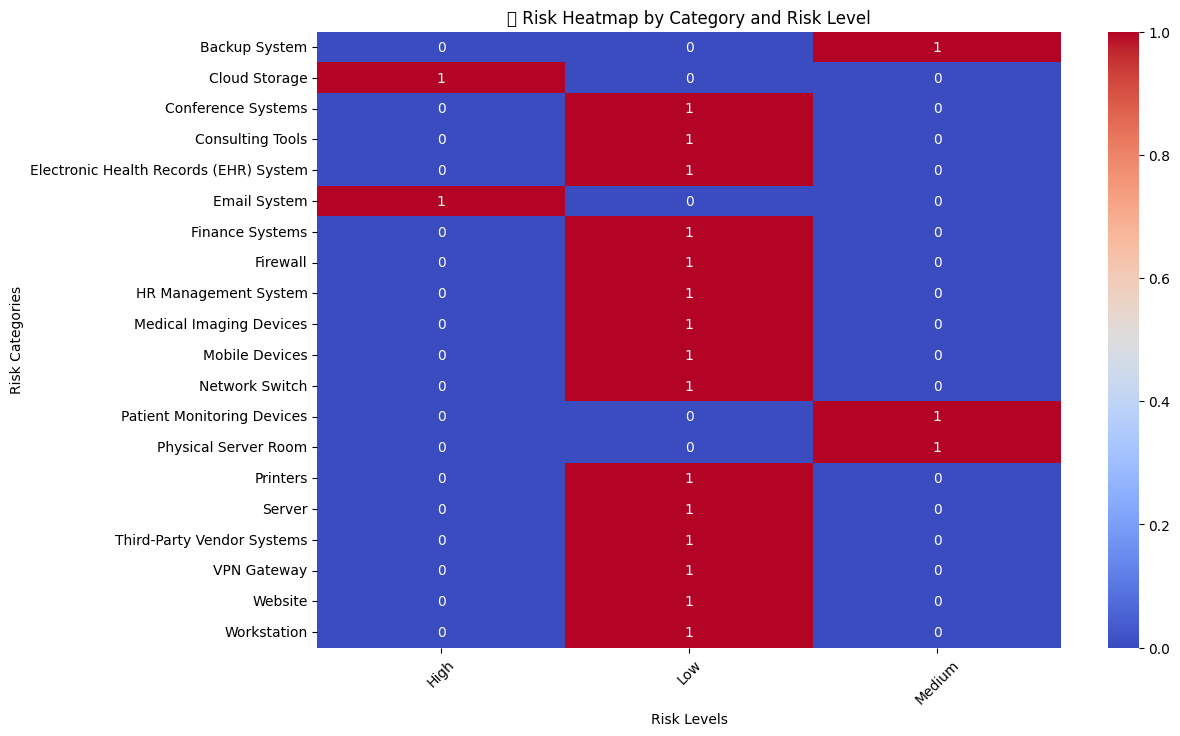

In [9]:
df_risks = upload_and_parse_risk_register_colab()


In [10]:
# 📚 Install requirements if not already done
!pip install -q seaborn scikit-learn

# 📦 Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import files
import io
import random

# 🛠️ Upload and Parse Risk Register
def upload_and_parse_risk_register_colab():
    print("📂 Please upload your Risk Register (CSV or Excel)...")
    uploaded = files.upload()

    if uploaded:
        for filename in uploaded.keys():
            print(f"✅ Uploaded: {filename}")

            if filename.endswith(".csv"):
                df = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))
            elif filename.endswith(".xlsx"):
                df = pd.read_excel(io.BytesIO(uploaded[filename]))
            else:
                print("❌ Unsupported file type. Please upload CSV or XLSX.")
                return None

            expected_columns = [
                "ID", "Name", "Description", "Controls", "Categories", "Treatment",
                "Inherent impact", "Inherent likelihood", "Inherent Score",
                "Residual Impact", "Residual likelihood", "Residual Score",
                "Type", "Status", "Owner", "Anticipated completion date",
                "Completed date", "Reviewers"
            ]

            missing = set(expected_columns) - set(df.columns)
            if missing:
                print(f"❌ Missing columns: {missing}")
                return None

            numeric_fields = [
                "Inherent impact", "Inherent likelihood", "Inherent Score",
                "Residual Impact", "Residual likelihood", "Residual Score"
            ]
            for field in numeric_fields:
                df[field] = pd.to_numeric(df[field], errors="coerce")

            missing_residuals = df["Residual Score"].isnull()

            if missing_residuals.any():
                print(f"🔧 Auto-calculating {missing_residuals.sum()} missing Residual Scores...")
                df.loc[missing_residuals, "Residual Score"] = (
                    df.loc[missing_residuals, "Residual Impact"] *
                    df.loc[missing_residuals, "Residual likelihood"]
                )

            # Risk Level Assignment
            def assign_risk_level(score):
                if pd.isna(score):
                    return "Unknown"
                elif score >= 15:
                    return "Critical"
                elif score >= 10:
                    return "High"
                elif score >= 5:
                    return "Medium"
                else:
                    return "Low"

            df["Risk Level"] = df["Residual Score"].apply(assign_risk_level)

            # ✅ Display table
            display(df.sort_values(by="Residual Score", ascending=False))

            # 🎨 Draw Heatmap
            plt.figure(figsize=(12, 8))
            heatmap_data = df.pivot_table(
                index="Categories",
                columns="Risk Level",
                values="Residual Score",
                aggfunc="count",
                fill_value=0
            )
            sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm")
            plt.title("🔥 Risk Heatmap by Category and Risk Level")
            plt.ylabel("Risk Categories")
            plt.xlabel("Risk Levels")
            plt.xticks(rotation=45)
            plt.yticks(rotation=0)
            plt.show()

            return df

    else:
        print("❗ No file uploaded.")
        return None

# 🔮 Simple Prediction Models (Simulated Example)

def predict_malware_vulnerability(df):
    print("\n🔮 Predicting Malware Vulnerability...")
    df['Vulnerable'] = np.where(df['Residual Score'] > 10, 1, 0)
    vulnerability_rate = df['Vulnerable'].mean()
    if vulnerability_rate > 0.5:
        print(f"⚠️ Organization is LIKELY vulnerable to malware attacks (Risk: {vulnerability_rate:.2%}).")
    else:
        print(f"✅ Organization is LESS LIKELY vulnerable to malware (Risk: {vulnerability_rate:.2%}).")

def predict_attack_type(df):
    print("\n🎯 Predicting Likely Attack Type...")
    attack_types = ["Ransomware", "APT", "Phishing", "SQL Injection"]
    predictions = [random.choice(attack_types) for _ in range(len(df))]
    df["Predicted Attack Type"] = predictions
    print("Sample Attack Type Predictions:")
    print(df[["Name", "Predicted Attack Type"]].head())

def predict_ransom_behavior(df):
    print("\n🧠 Predicting Ransom Behavior...")
    ransom_predictions = ["Will Pay Ransom", "Will Resist and Defend"]
    decision = random.choice(ransom_predictions)
    print(f"🛡️ Prediction: {decision}")

# 🏛️ Architecture Recommendation
def recommend_secure_architecture(df):
    print("\n🏛️ Recommending Secure System Architecture...")
    top_controls = df["Controls"].value_counts().head(5).index.tolist()
    print("Suggested Key Controls for Architecture Strengthening:")
    for ctrl in top_controls:
        print(f"✅ {ctrl}")

# 📢 Critical Risk Alerts
def check_critical_risks(df):
    critical_count = (df["Risk Level"] == "Critical").sum()
    if critical_count > 0:
        print(f"🚨 {critical_count} Critical Risks detected! Immediate action recommended.")
    else:
        print("✅ No immediate critical risks detected.")

# 💾 Save Cleaned Risk Register
def save_cleaned_register(df):
    df.to_csv("cleaned_risk_register.csv", index=False)
    print("📦 Cleaned Risk Register Saved as 'cleaned_risk_register.csv'.")

# 🎯 Full Pipeline Runner
def full_pipeline():
    df = upload_and_parse_risk_register_colab()
    if df is not None:
        predict_malware_vulnerability(df)
        predict_attack_type(df)
        predict_ransom_behavior(df)
        recommend_secure_architecture(df)
        check_critical_risks(df)
        save_cleaned_register(df)
    else:
        print("❌ Pipeline stopped due to upload issues.")

# 🚀 Now just run:
# full_pipeline()


📂 Please upload your Risk Register (CSV or Excel)...


Saving automated_risk_assessment.csv to automated_risk_assessment (2).csv
✅ Uploaded: automated_risk_assessment (2).csv


,ID,Name,Description,Controls,Categories,Treatment,Inherent impact,Inherent likelihood,Inherent Score,Residual Impact,Residual likelihood,Residual Score,Type,Status,Owner,Anticipated completion date,Completed date,Reviewers,Risk Level
11,EFM-12,Email Filtering and Monitoring,Control to ensure email filtering and monitori...,No,Email System,Avoid,5,2,10,5,2,10,Preventive,Monitoring,IT Department,2025-04-08,NaN,External Consultant,High
5,CSP-06,Cloud Security Policies,Control to ensure cloud security policies for ...,Yes,Cloud Storage,Transfer,5,2,10,5,2,10,Preventive,Monitoring,Operations Manager,2025-04-10,NaN,Risk Manager,High
6,BAR-07,Backup and Recovery,Control to ensure backup and recovery for back...,No,Backup System,Mitigate,2,4,8,2,4,8,Detective,Completed,Compliance Officer,2025-02-28,2025-06-06,External Consultant,Medium
7,PAC-08,Physical Access Control,Control to ensure physical access control for ...,No,Physical Server Room,Accept,5,2,10,4,2,8,Preventive,Monitoring,Compliance Officer,2025-04-08,NaN,External Consultant,Medium
12,ISM-13,IoT Security Management,Control to ensure iot security management for ...,Yes,Patient Monitoring Devices,Transfer,3,4,12,2,4,8,Preventive,Monitoring,Compliance Officer,2025-03-27,NaN,Internal Auditor,Medium
16,SPP-17,Secure Printing Policies,Control to ensure secure printing policies for...,No,Printers,Mitigate,2,5,10,1,4,4,Preventive,Active,IT Department,2025-05-31,NaN,Internal Auditor,Low
17,SMM-18,Secure Meeting Management,Control to ensure secure meeting management fo...,No,Conference Systems,Transfer,3,5,15,1,4,4,Detective,Completed,IT Department,2025-02-28,2025-03-24,Risk Manager,Low
2,NAC-03,Network Access Control,Control to ensure network access control for n...,Yes,Network Switch,Avoid,2,5,10,1,4,4,Detective,Completed,Compliance Officer,2025-05-01,2025-04-20,Internal Auditor,Low
0,PMM-01,Patch Management,Control to ensure patch management for server.,Yes,Server,Transfer,2,3,6,1,3,3,Detective,Completed,IT Department,2025-04-10,2025-06-14,Internal Auditor,Low
3,FCC-04,Firewall Configuration,Control to ensure firewall configuration for f...,Yes,Firewall,Transfer,1,5,5,1,3,3,Corrective,Monitoring,Operations Manager,2025-03-28,NaN,Risk Manager,Low


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


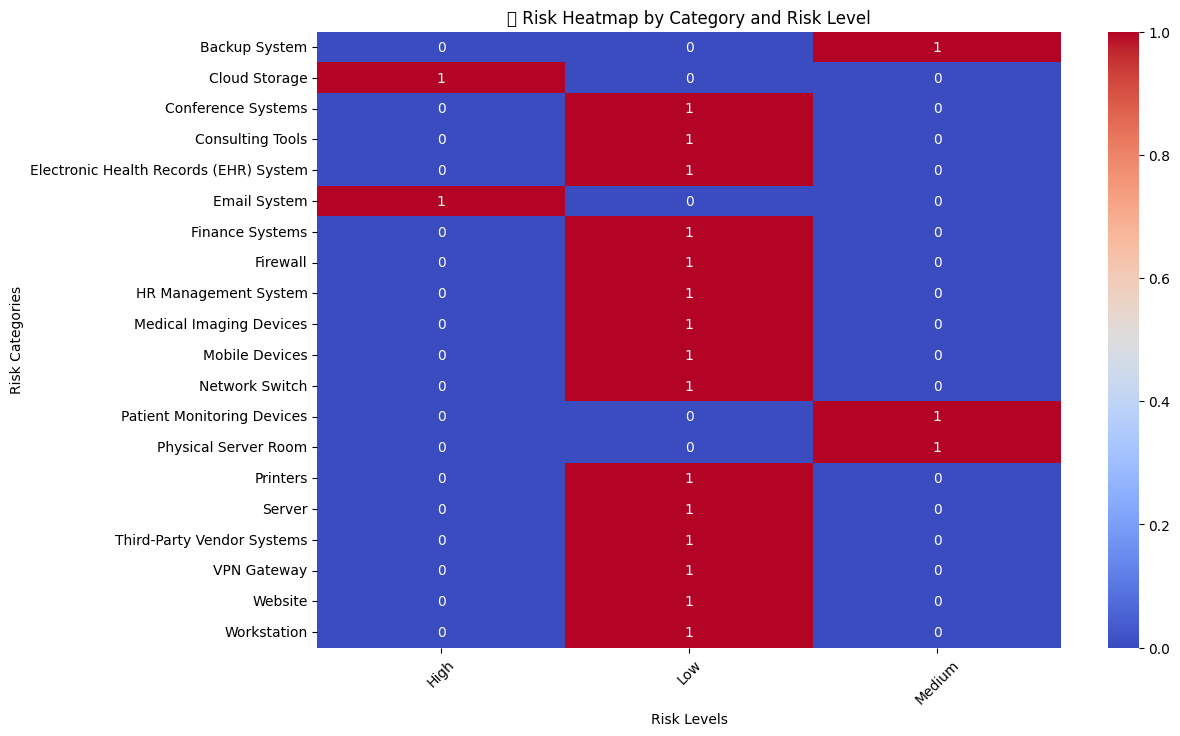


🔮 Predicting Malware Vulnerability...
✅ Organization is LESS LIKELY vulnerable to malware (Risk: 0.00%).

🎯 Predicting Likely Attack Type...
Sample Attack Type Predictions:
                     Name Predicted Attack Type
0        Patch Management                   APT
1      Antivirus Software              Phishing
2  Network Access Control                   APT
3  Firewall Configuration         SQL Injection
4         Data Encryption            Ransomware

🧠 Predicting Ransom Behavior...
🛡️ Prediction: Will Resist and Defend

🏛️ Recommending Secure System Architecture...
Suggested Key Controls for Architecture Strengthening:
✅ Yes
✅ No
✅ No immediate critical risks detected.
📦 Cleaned Risk Register Saved as 'cleaned_risk_register.csv'.


In [11]:
full_pipeline()


In [20]:
def dynamic_architecture_recommendations(risk_df):
    """
    Dynamically recommend security controls based on risk register analysis.

    Args:
        risk_df (pd.DataFrame): Risk register with Residual Scores and Risk Levels.
    """

    print("🏛️ Recommending Secure System Architecture...\n")

    # Basic Risk Analysis
    high_risks = risk_df[risk_df['Risk Level'] == 'High']
    medium_risks = risk_df[risk_df['Risk Level'] == 'Medium']
    low_risks = risk_df[risk_df['Risk Level'] == 'Low']

    # Dynamic Control Recommendations
    recommended_controls = []

    # If there are HIGH risks, recommend critical controls
    if not high_risks.empty:
        recommended_controls.extend([
            "Implement Multi-Factor Authentication (MFA)",
            "Deploy Endpoint Detection and Response (EDR)",
            "Perform Immediate Patching of Critical Vulnerabilities",
            "Implement Zero Trust Architecture",
            "Harden Privileged Access Management (PAM)"
        ])

    # If there are MEDIUM risks, recommend strengthening measures
    if not medium_risks.empty:
        recommended_controls.extend([
            "Enforce Regular Vulnerability Scanning and Penetration Testing",
            "Enhance Email Security Gateways (Anti-Phishing)",
            "Conduct Cybersecurity Awareness Training",
            "Strengthen Backup and Disaster Recovery Plans"
        ])

    # If mostly LOW risks, recommend maintenance best practices
    if high_risks.empty and medium_risks.empty:
        recommended_controls.extend([
            "Maintain Security Information and Event Management (SIEM) Monitoring",
            "Perform Annual Risk Assessments",
            "Maintain Asset Inventory and Configuration Management",
            "Continuously Update Anti-malware Tools"
        ])

    # Remove any duplicate recommendations
    recommended_controls = list(set(recommended_controls))

    # Output Section
    print("🔒 Suggested Key Controls for Strengthening:\n")
    for control in recommended_controls:
        print(f"- ✅ {control}")

    print("\n📋 Risk Summary:")
    print(f"- 🔥 Number of High Risks: {len(high_risks)}")
    print(f"- ⚠️ Number of Medium Risks: {len(medium_risks)}")
    print(f"- 🟢 Number of Low Risks: {len(low_risks)}")

    if len(high_risks) > 0:
        print("- 🛑 Immediate Action Required: YES")
    else:
        print("- ✅ Immediate Action Required: NO")

    print("- 🛡️ System Architecture Status: Recommend hardening based on risk analysis.")

# Example usage after parsing/uploading your CSV risk register:
#Corrected indentation here to align with the function definition.
df = pd.read_csv('cleaned_risk_register.csv') # Use the saved file from full_pipeline()
dynamic_architecture_recommendations(df)

🏛️ Recommending Secure System Architecture...

🔒 Suggested Key Controls for Strengthening:

- ✅ Strengthen Backup and Disaster Recovery Plans
- ✅ Implement Zero Trust Architecture
- ✅ Implement Multi-Factor Authentication (MFA)
- ✅ Enhance Email Security Gateways (Anti-Phishing)
- ✅ Deploy Endpoint Detection and Response (EDR)
- ✅ Harden Privileged Access Management (PAM)
- ✅ Perform Immediate Patching of Critical Vulnerabilities
- ✅ Conduct Cybersecurity Awareness Training
- ✅ Enforce Regular Vulnerability Scanning and Penetration Testing

📋 Risk Summary:
- 🔥 Number of High Risks: 2
- ⚠️ Number of Medium Risks: 3
- 🟢 Number of Low Risks: 15
- 🛑 Immediate Action Required: YES
- 🛡️ System Architecture Status: Recommend hardening based on risk analysis.


In [21]:
# 📚 Install requirements if not already done
!pip install -q seaborn scikit-learn

# 📦 Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import files
import io
import random

# 🛠️ Upload and Parse Risk Register
def upload_and_parse_risk_register_colab():
    print("📂 Please upload your Risk Register (CSV or Excel)...")
    uploaded = files.upload()

    if uploaded:
        for filename in uploaded.keys():
            print(f"✅ Uploaded: {filename}")

            if filename.endswith(".csv"):
                df = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))
            elif filename.endswith(".xlsx"):
                df = pd.read_excel(io.BytesIO(uploaded[filename]))
            else:
                print("❌ Unsupported file type. Please upload CSV or XLSX.")
                return None

            expected_columns = [
                "ID", "Name", "Description", "Controls", "Categories", "Treatment",
                "Inherent impact", "Inherent likelihood", "Inherent Score",
                "Residual Impact", "Residual likelihood", "Residual Score",
                "Type", "Status", "Owner", "Anticipated completion date",
                "Completed date", "Reviewers"
            ]

            missing = set(expected_columns) - set(df.columns)
            if missing:
                print(f"❌ Missing columns: {missing}")
                return None

            numeric_fields = [
                "Inherent impact", "Inherent likelihood", "Inherent Score",
                "Residual Impact", "Residual likelihood", "Residual Score"
            ]
            for field in numeric_fields:
                df[field] = pd.to_numeric(df[field], errors="coerce")

            missing_residuals = df["Residual Score"].isnull()
            if missing_residuals.any():
                print(f"🔧 Auto-calculating {missing_residuals.sum()} missing Residual Scores...")
                df.loc[missing_residuals, "Residual Score"] = (
                    df.loc[missing_residuals, "Residual Impact"] *
                    df.loc[missing_residuals, "Residual likelihood"]
                )

            # Risk Level Assignment
            def assign_risk_level(score):
                if pd.isna(score):
                    return "Unknown"
                elif score >= 15:
                    return "Critical"
                elif score >= 10:
                    return "High"
                elif score >= 5:
                    return "Medium"
                else:
                    return "Low"

            df["Risk Level"] = df["Residual Score"].apply(assign_risk_level)

            # ✅ Display Table
            display(df.sort_values(by="Residual Score", ascending=False))

            # 🎨 Draw Heatmap
            plt.figure(figsize=(12, 8))
            heatmap_data = df.pivot_table(
                index="Categories",
                columns="Risk Level",
                values="Residual Score",
                aggfunc="count",
                fill_value=0
            )
            sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm")
            plt.title("🔥 Risk Heatmap by Category and Risk Level")
            plt.ylabel("Risk Categories")
            plt.xlabel("Risk Levels")
            plt.xticks(rotation=45)
            plt.yticks(rotation=0)
            plt.show()

            return df

    else:
        print("❗ No file uploaded.")
        return None

# 🔮 Malware Vulnerability Prediction Engine
def predict_malware_vulnerability(df):
    print("\n🔮 Predicting Malware Vulnerability...")
    df['Vulnerable'] = np.where(df['Residual Score'] > 10, 1, 0)
    vulnerability_rate = df['Vulnerable'].mean()
    if vulnerability_rate > 0.5:
        print(f"⚠️ Organization is LIKELY vulnerable to malware attacks (Risk Level: {vulnerability_rate:.2%})")
    else:
        print(f"✅ Organization is LESS LIKELY vulnerable to malware (Risk Level: {vulnerability_rate:.2%})")

# 🧠 Ransomware Behavior Prediction Engine
def predict_ransom_behavior(df):
    print("\n🧠 Predicting Ransomware Behavior...")
    high_risk_count = (df['Risk Level'] == 'Critical').sum() + (df['Risk Level'] == 'High').sum()
    if high_risk_count > 5:
        print("💸 Organization is LIKELY to pay ransom under attack pressure.")
    else:
        print("🛡️ Organization is LIKELY to resist and defend without paying ransom.")

# 🏛️ Secure Architecture Recommendation Engine
def recommend_secure_architecture(df):
    print("\n🏛️ Recommending Secure System Architecture...")
    top_controls = df["Controls"].value_counts().head(5).index.tolist()
    print("🔐 Suggested Key Controls for Architecture Strengthening:")
    for ctrl in top_controls:
        print(f"✅ {ctrl}")

# 🚨 Critical Risk Alerts
def check_critical_risks(df):
    critical_count = (df["Risk Level"] == "Critical").sum()
    if critical_count > 0:
        print(f"🚨 {critical_count} Critical Risks detected! Immediate action required.")
    else:
        print("✅ No immediate critical risks detected.")

# 💾 Save Cleaned Risk Register
def save_cleaned_register(df):
    df.to_csv("cleaned_risk_register.csv", index=False)
    print("📦 Cleaned Risk Register Saved as 'cleaned_risk_register.csv'.")

# 🎯 Full Pipeline Runner
def full_pipeline():
    df = upload_and_parse_risk_register_colab()
    if df is not None:
        predict_malware_vulnerability(df)             # Malware Vulnerability Engine
        predict_ransom_behavior(df)                    # Ransomware Behavior Engine
        recommend_secure_architecture(df)              # Secure Architecture Recommendation
        check_critical_risks(df)                       # Critical Risk Alert
        save_cleaned_register(df)                      # Save Result
    else:
        print("❌ Pipeline stopped due to upload issues.")

# 🚀 Run your complete system with:
# full_pipeline()


📂 Please upload your Risk Register (CSV or Excel)...


Saving automated_risk_assessment.csv to automated_risk_assessment (3).csv
✅ Uploaded: automated_risk_assessment (3).csv


,ID,Name,Description,Controls,Categories,Treatment,Inherent impact,Inherent likelihood,Inherent Score,Residual Impact,Residual likelihood,Residual Score,Type,Status,Owner,Anticipated completion date,Completed date,Reviewers,Risk Level
11,EFM-12,Email Filtering and Monitoring,Control to ensure email filtering and monitori...,No,Email System,Avoid,5,2,10,5,2,10,Preventive,Monitoring,IT Department,2025-04-08,NaN,External Consultant,High
5,CSP-06,Cloud Security Policies,Control to ensure cloud security policies for ...,Yes,Cloud Storage,Transfer,5,2,10,5,2,10,Preventive,Monitoring,Operations Manager,2025-04-10,NaN,Risk Manager,High
6,BAR-07,Backup and Recovery,Control to ensure backup and recovery for back...,No,Backup System,Mitigate,2,4,8,2,4,8,Detective,Completed,Compliance Officer,2025-02-28,2025-06-06,External Consultant,Medium
7,PAC-08,Physical Access Control,Control to ensure physical access control for ...,No,Physical Server Room,Accept,5,2,10,4,2,8,Preventive,Monitoring,Compliance Officer,2025-04-08,NaN,External Consultant,Medium
12,ISM-13,IoT Security Management,Control to ensure iot security management for ...,Yes,Patient Monitoring Devices,Transfer,3,4,12,2,4,8,Preventive,Monitoring,Compliance Officer,2025-03-27,NaN,Internal Auditor,Medium
16,SPP-17,Secure Printing Policies,Control to ensure secure printing policies for...,No,Printers,Mitigate,2,5,10,1,4,4,Preventive,Active,IT Department,2025-05-31,NaN,Internal Auditor,Low
17,SMM-18,Secure Meeting Management,Control to ensure secure meeting management fo...,No,Conference Systems,Transfer,3,5,15,1,4,4,Detective,Completed,IT Department,2025-02-28,2025-03-24,Risk Manager,Low
2,NAC-03,Network Access Control,Control to ensure network access control for n...,Yes,Network Switch,Avoid,2,5,10,1,4,4,Detective,Completed,Compliance Officer,2025-05-01,2025-04-20,Internal Auditor,Low
0,PMM-01,Patch Management,Control to ensure patch management for server.,Yes,Server,Transfer,2,3,6,1,3,3,Detective,Completed,IT Department,2025-04-10,2025-06-14,Internal Auditor,Low
3,FCC-04,Firewall Configuration,Control to ensure firewall configuration for f...,Yes,Firewall,Transfer,1,5,5,1,3,3,Corrective,Monitoring,Operations Manager,2025-03-28,NaN,Risk Manager,Low


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


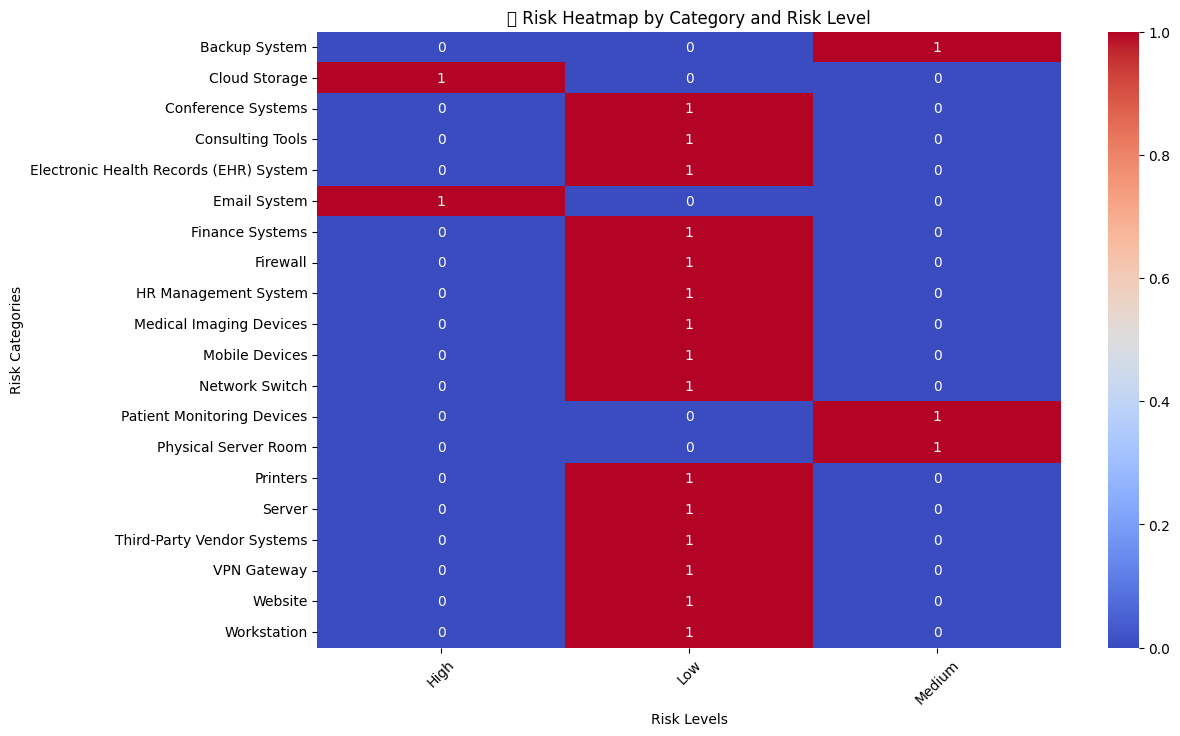


🔮 Predicting Malware Vulnerability...
✅ Organization is LESS LIKELY vulnerable to malware (Risk Level: 0.00%)

🧠 Predicting Ransomware Behavior...
🛡️ Organization is LIKELY to resist and defend without paying ransom.

🏛️ Recommending Secure System Architecture...
🔐 Suggested Key Controls for Architecture Strengthening:
✅ Yes
✅ No
✅ No immediate critical risks detected.
📦 Cleaned Risk Register Saved as 'cleaned_risk_register.csv'.


In [22]:
full_pipeline()
